**Import Packages**

In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

**1. VOTING**

In [2]:
# import dataset
data1 = arff.loadarff('ionosphere.arff')
df1 = pd.DataFrame(data1[0])
# remove b from a byte stringx
df1['class'] = df1['class'].str.decode('utf-8')

In [3]:
# x = df1.iloc[:, range(0,34)]
# y = df1.loc[:,['class']]
# x_train = x[251:]
# x_test = x[:100]
# y_train = y[251:]
# y_test = y[:100]
x = df1.iloc[:, range(0,34)]
# Class variables
y = df1['class']
# last 25 percent examples for testing
# remaining examples for training
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                        train_size=0.75,
                                                       shuffle=False,
                                                       random_state=1)


Try trees of different depth (1, 2, 3, 5, 10) and different
sizes of bag or ensemble, i.e., number of trees (10, 20, 40, 60, 80, 100). Compute the training accuracy and testing accuracy for different combinations of tree depth and number of trees; and plot them. List your observations.

Bagged Decision Tree

In [4]:
def baggedDecision(depth, x_train, y_train):
    numTree = [10, 20, 40, 60, 80, 100]
    Testaccuracy = []
    Trainaccuracy = []
    for n_estimators in numTree:
        clf = BaggingClassifier(DecisionTreeClassifier(max_depth=depth),
                           n_estimators=n_estimators, random_state=1)
        clf.fit(x_train,y_train.values.ravel())
        Trainacc = clf.score(x_train, y_train)
        Testacc = clf.score(x_test, y_test)
        Trainaccuracy.append(Trainacc)
        Testaccuracy.append(Testacc)
    plt.plot(numTree, Trainaccuracy)
    plt.plot(numTree, Testaccuracy)
    plt.title(f"Depth: {depth}")
    plt.xlabel("Number of Tree")
    plt.ylabel("Accuracy")
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    decTree1 = {'Depth' : depth,
    'Num of Tree' : numTree,
      'Train': Trainaccuracy,
     'Test' : Testaccuracy}
    decTreeTb1 = pd.DataFrame(decTree1)
    print(decTreeTb1)
    return decTreeTb1, Trainaccuracy, Testaccuracy
    

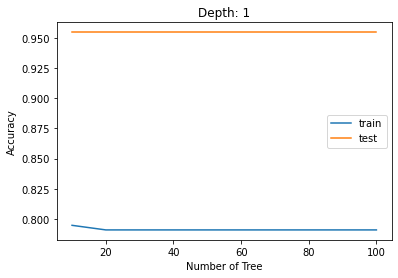

   Depth  Num of Tree     Train      Test
0      1           10  0.794677  0.954545
1      1           20  0.790875  0.954545
2      1           40  0.790875  0.954545
3      1           60  0.790875  0.954545
4      1           80  0.790875  0.954545
5      1          100  0.790875  0.954545


In [5]:
aTable, aTrain, aTest = baggedDecision(1, x_train, y_train)

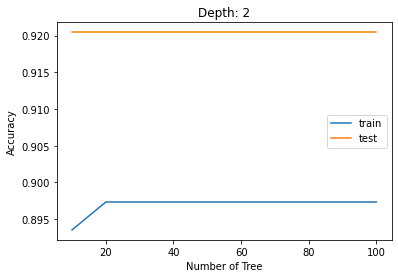

   Depth  Num of Tree     Train      Test
0      2           10  0.893536  0.920455
1      2           20  0.897338  0.920455
2      2           40  0.897338  0.920455
3      2           60  0.897338  0.920455
4      2           80  0.897338  0.920455
5      2          100  0.897338  0.920455


(   Depth  Num of Tree     Train      Test
 0      2           10  0.893536  0.920455
 1      2           20  0.897338  0.920455
 2      2           40  0.897338  0.920455
 3      2           60  0.897338  0.920455
 4      2           80  0.897338  0.920455
 5      2          100  0.897338  0.920455,
 [0.8935361216730038,
  0.8973384030418251,
  0.8973384030418251,
  0.8973384030418251,
  0.8973384030418251,
  0.8973384030418251],
 [0.9204545454545454,
  0.9204545454545454,
  0.9204545454545454,
  0.9204545454545454,
  0.9204545454545454,
  0.9204545454545454])

In [6]:
baggedDecision(2, x_train, y_train)

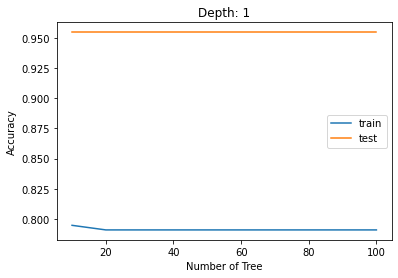

,Depth,Num of Tree,Train,Test
0,1,10,0.794677,0.954545
1,1,20,0.790875,0.954545
2,1,40,0.790875,0.954545
3,1,60,0.790875,0.954545
4,1,80,0.790875,0.954545
5,1,100,0.790875,0.954545


In [7]:
# depth = 1 
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
Testaccuracy = []
Trainaccuracy = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(x_train,y_train.values.ravel())
    Trainacc = clf.score(x_train, y_train)
    Testacc = clf.score(x_test, y_test)
    Trainaccuracy.append(Trainacc)
    Testaccuracy.append(Testacc)
plt.plot(numTree, Trainaccuracy)
plt.plot(numTree, Testaccuracy)
plt.title("Depth: 1")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree1 = {'Depth' : 1,
    'Num of Tree' : numTree,
      'Train': Trainaccuracy,
     'Test' : Testaccuracy}
decTreeTb1 = pd.DataFrame(decTree1)
decTreeTb1

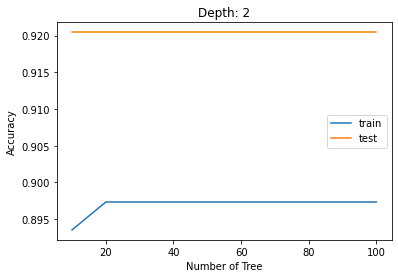

,Depth,Num of Tree,Train,Test
0,2,10,0.893536,0.920455
1,2,20,0.897338,0.920455
2,2,40,0.897338,0.920455
3,2,60,0.897338,0.920455
4,2,80,0.897338,0.920455
5,2,100,0.897338,0.920455


In [8]:
# depth = 2
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
Testaccuracy2 = []
Trainaccuracy2 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(x_train,y_train.values.ravel())
    Trainacc = clf.score(x_train, y_train)
    Testacc = clf.score(x_test, y_test)
    Trainaccuracy2.append(Trainacc)
    Testaccuracy2.append(Testacc)
plt.plot(numTree, Trainaccuracy2)
plt.plot(numTree, Testaccuracy2)
plt.title("Depth: 2")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree2 = {'Depth' : 2,
    'Num of Tree' : numTree,
      'Train': Trainaccuracy2,
     'Test' : Testaccuracy2}
decTreeTb2 = pd.DataFrame(decTree2)
decTreeTb2

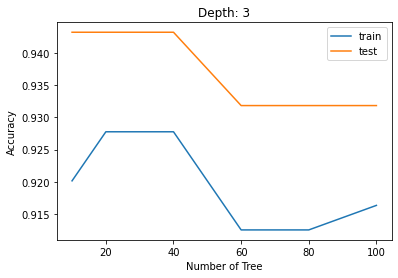

,Depth,Num of Tree,Train,Test
0,3,10,0.920152,0.943182
1,3,20,0.927757,0.943182
2,3,40,0.927757,0.943182
3,3,60,0.912548,0.931818
4,3,80,0.912548,0.931818
5,3,100,0.916350,0.931818


In [9]:
# depth = 3
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
Testaccuracy3 = []
Trainaccuracy3 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(x_train,y_train.values.ravel())
    Trainacc = clf.score(x_train, y_train)
    Testacc = clf.score(x_test, y_test)
    Trainaccuracy3.append(Trainacc)
    Testaccuracy3.append(Testacc)
plt.plot(numTree, Trainaccuracy3)
plt.plot(numTree, Testaccuracy3)
plt.title("Depth: 3")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree3 = {'Depth' : 3,
    'Num of Tree' : numTree,
      'Train': Trainaccuracy3,
     'Test' : Testaccuracy3}
decTreeTb3 = pd.DataFrame(decTree3)
decTreeTb3

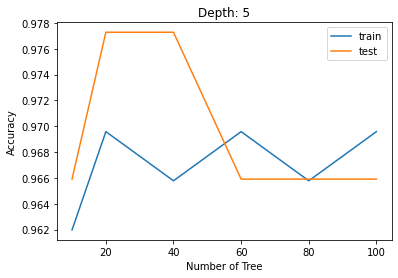

,Depth,Num of Tree,Train,Test
0,5,10,0.961977,0.965909
1,5,20,0.969582,0.977273
2,5,40,0.965779,0.977273
3,5,60,0.969582,0.965909
4,5,80,0.965779,0.965909
5,5,100,0.969582,0.965909


In [10]:
# depth = 5
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
Testaccuracy5 = []
Trainaccuracy5 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(x_train,y_train.values.ravel())
    Trainacc = clf.score(x_train, y_train)
    Testacc = clf.score(x_test, y_test)
    Trainaccuracy5.append(Trainacc)
    Testaccuracy5.append(Testacc)
plt.plot(numTree, Trainaccuracy5)
plt.plot(numTree, Testaccuracy5)
plt.title("Depth: 5")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree5 = {'Depth' : 5,
    'Num of Tree' : numTree,
      'Train': Trainaccuracy5,
     'Test' : Testaccuracy5}
decTreeTb5 = pd.DataFrame(decTree5)
decTreeTb5

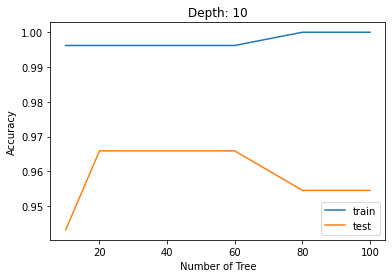

,Depth,Num of Tree,Train,Test
0,10,10,0.996198,0.943182
1,10,20,0.996198,0.965909
2,10,40,0.996198,0.965909
3,10,60,0.996198,0.965909
4,10,80,1.000000,0.954545
5,10,100,1.000000,0.954545


In [11]:
# depth = 10
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
Testaccuracy10 = []
Trainaccuracy10 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=10),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(x_train,y_train.values.ravel())
    Trainacc = clf.score(x_train, y_train)
    Testacc = clf.score(x_test, y_test)
    Trainaccuracy10.append(Trainacc)
    Testaccuracy10.append(Testacc)
plt.plot(numTree, Trainaccuracy10)
plt.plot(numTree, Testaccuracy10)
plt.title("Depth: 10")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree10 = {'Depth' : 10,
    'Num of Tree' : numTree,
      'Train': Trainaccuracy10,
     'Test' : Testaccuracy10}
decTreeTb10 = pd.DataFrame(decTree10)
decTreeTb10

SVM Classification

(a) Using a linear kernel (-t 0 option), train the SVM on the training data for different values of C parameter(-c option): 10−4, 10−3, 10−2, 10−1, 100, 101, 102, 103, 104. Com- pute the training accuracy, and testing accuracy for the SVM obtained with different values of the C parameter. Plot the training accuracy and testing accuracy as a func- tion of C (C value on x-axis and Accuracy on y-axis) – one curve each for training, validation, and testing data. List your observations.

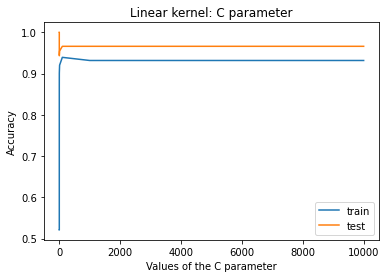

,Kernel,Degree,C Parameter,Train,Test
0,Linear,0,0.0001,0.520913,1.000000
1,Linear,0,0.0010,0.520913,1.000000
2,Linear,0,0.0100,0.840304,0.965909
3,Linear,0,0.1000,0.874525,0.943182
4,Linear,0,1.0000,0.901141,0.943182
5,Linear,0,10.0000,0.920152,0.954545
6,Linear,0,100.0000,0.939163,0.965909
7,Linear,0,1000.0000,0.931559,0.965909
8,Linear,0,10000.0000,0.931559,0.965909


In [12]:
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
TestaccuracyLVote = []
TrainaccuracyLVote = []
for n_estimators in cPara:
    svm_md = SVC(kernel='linear', C= n_estimators, random_state=1)
    svm_md.fit(x_train,y_train.values.ravel())
    Trainacc = svm_md.score(x_train, y_train)
    Testacc = svm_md.score(x_test, y_test)
    TrainaccuracyLVote.append(Trainacc)
    TestaccuracyLVote.append(Testacc)
plt.plot(cPara, TrainaccuracyLVote)
plt.plot(cPara, TestaccuracyLVote)
plt.title("Linear kernel: C parameter")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdListVL = {
               'Kernel' : 'Linear',
    'Degree' : 0,
    'C Parameter' : cPara,
      'Train': TrainaccuracyLVote,
     'Test' : TestaccuracyLVote}
svmTbVote = pd.DataFrame(svmMdListVL)
svmTbVote

(b) Repeat the experiment (a) with polynomial kernel (-t 1 -d option) of degree 2, 3, and 4. Compare the training and testing accuracies for different kernels (linear, polynomial kernel of degree 2, polynomial kernel of degree 3, and polynomial kernel of degree 4). List your observations.


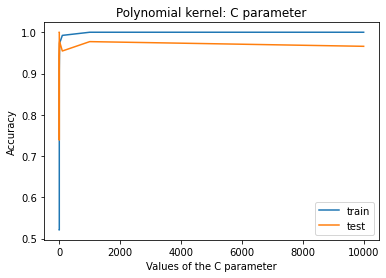

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,2,0.0001,0.520913,1.000000
1,Polynomial,2,0.0010,0.520913,1.000000
2,Polynomial,2,0.0100,0.520913,1.000000
3,Polynomial,2,0.1000,0.828897,0.738636
4,Polynomial,2,1.0000,0.908745,0.943182
5,Polynomial,2,10.0000,0.973384,0.977273
6,Polynomial,2,100.0000,0.992395,0.954545
7,Polynomial,2,1000.0000,1.000000,0.977273
8,Polynomial,2,10000.0000,1.000000,0.965909


In [13]:
# Degree 2
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
TestaccuracyLVote2 = []
TrainaccuracyLVote2 = []
for n_estimators in cPara:
    svm_md = SVC(kernel='poly', degree=2, C= n_estimators, random_state=1)
    svm_md.fit(x_train,y_train.values.ravel())
    Trainacc = svm_md.score(x_train, y_train)
    Testacc = svm_md.score(x_test, y_test)
    TrainaccuracyLVote2.append(Trainacc)
    TestaccuracyLVote2.append(Testacc)
plt.plot(cPara, TrainaccuracyLVote2)
plt.plot(cPara, TestaccuracyLVote2)
plt.title("Polynomial kernel: C parameter")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdListVL2 = {'Kernel' : 'Polynomial',
                'Degree' : 2,
    'C Parameter' : cPara,
      'Train': TrainaccuracyLVote2,
     'Test' : TestaccuracyLVote2}
svmTbVote2 = pd.DataFrame(svmMdListVL2)
svmTbVote2

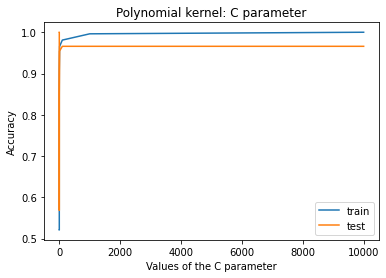

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,3,0.0001,0.520913,1.000000
1,Polynomial,3,0.0010,0.520913,1.000000
2,Polynomial,3,0.0100,0.520913,1.000000
3,Polynomial,3,0.1000,0.840304,0.568182
4,Polynomial,3,1.0000,0.908745,0.852273
5,Polynomial,3,10.0000,0.965779,0.954545
6,Polynomial,3,100.0000,0.980989,0.965909
7,Polynomial,3,1000.0000,0.996198,0.965909
8,Polynomial,3,10000.0000,1.000000,0.965909


In [14]:
# Degree 3
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
TestaccuracyLVote3 = []
TrainaccuracyLVote3 = []
for n_estimators in cPara:
    svm_md = SVC(kernel='poly', degree=3, C= n_estimators, random_state=1)
    svm_md.fit(x_train,y_train.values.ravel())
    Trainacc = svm_md.score(x_train, y_train)
    Testacc = svm_md.score(x_test, y_test)
    TrainaccuracyLVote3.append(Trainacc)
    TestaccuracyLVote3.append(Testacc)
plt.plot(cPara, TrainaccuracyLVote3)
plt.plot(cPara, TestaccuracyLVote3)
plt.title("Polynomial kernel: C parameter")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdListVL3 = {'Kernel' : 'Polynomial',
                'Degree' : 3,
    'C Parameter' : cPara,
      'Train': TrainaccuracyLVote3,
     'Test' : TestaccuracyLVote3}
svmTbVote3 = pd.DataFrame(svmMdListVL3)
svmTbVote3

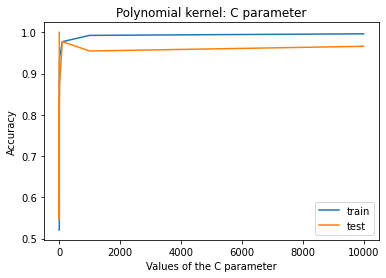

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,4,0.0001,0.520913,1.000000
1,Polynomial,4,0.0010,0.520913,1.000000
2,Polynomial,4,0.0100,0.574144,1.000000
3,Polynomial,4,0.1000,0.821293,0.545455
4,Polynomial,4,1.0000,0.912548,0.818182
5,Polynomial,4,10.0000,0.939163,0.875000
6,Polynomial,4,100.0000,0.977186,0.977273
7,Polynomial,4,1000.0000,0.992395,0.954545
8,Polynomial,4,10000.0000,0.996198,0.965909


In [15]:
# Degree 4
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
TestaccuracyLVote4 = []
TrainaccuracyLVote4 = []
for n_estimators in cPara:
    svm_md = SVC(kernel='poly', degree=4, C= n_estimators, random_state=1)
    svm_md.fit(x_train,y_train.values.ravel())
    Trainacc = svm_md.score(x_train, y_train)
    Testacc = svm_md.score(x_test, y_test)
    TrainaccuracyLVote4.append(Trainacc)
    TestaccuracyLVote4.append(Testacc)
plt.plot(cPara, TrainaccuracyLVote4)
plt.plot(cPara, TestaccuracyLVote4)
plt.title("Polynomial kernel: C parameter")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdListVL4 = {'Kernel' : 'Polynomial',
                'Degree' : 4,
    'C Parameter' : cPara,
      'Train': TrainaccuracyLVote4,
     'Test' : TestaccuracyLVote4}
svmTbVote4 = pd.DataFrame(svmMdListVL4)
svmTbVote4

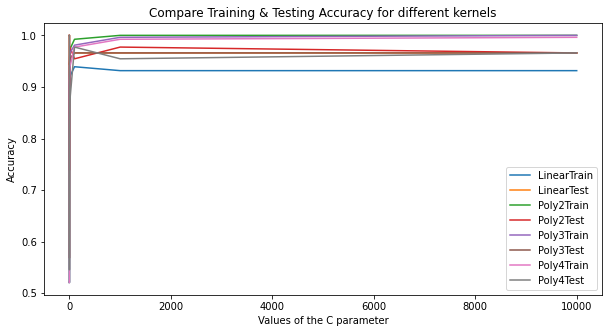

In [16]:
plt.figure(figsize=(10,5))
plt.plot(cPara, TrainaccuracyLVote)
plt.plot(cPara, TestaccuracyLVote)
plt.plot(cPara, TrainaccuracyLVote2)
plt.plot(cPara, TestaccuracyLVote2)
plt.plot(cPara, TrainaccuracyLVote3)
plt.plot(cPara, TestaccuracyLVote3)
plt.plot(cPara, TrainaccuracyLVote4)
plt.plot(cPara, TestaccuracyLVote4)
plt.title("Compare Training & Testing Accuracy for different kernels")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['LinearTrain', 'LinearTest',
            'Poly2Train', 'Poly2Test',
           'Poly3Train', 'Poly3Test',
           'Poly4Train', 'Poly4Test'], loc='best')
plt.show()

In [17]:
svmTbVote

,Kernel,Degree,C Parameter,Train,Test
0,Linear,0,0.0001,0.520913,1.000000
1,Linear,0,0.0010,0.520913,1.000000
2,Linear,0,0.0100,0.840304,0.965909
3,Linear,0,0.1000,0.874525,0.943182
4,Linear,0,1.0000,0.901141,0.943182
5,Linear,0,10.0000,0.920152,0.954545
6,Linear,0,100.0000,0.939163,0.965909
7,Linear,0,1000.0000,0.931559,0.965909
8,Linear,0,10000.0000,0.931559,0.965909


In [18]:
svmTbVote2

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,2,0.0001,0.520913,1.000000
1,Polynomial,2,0.0010,0.520913,1.000000
2,Polynomial,2,0.0100,0.520913,1.000000
3,Polynomial,2,0.1000,0.828897,0.738636
4,Polynomial,2,1.0000,0.908745,0.943182
5,Polynomial,2,10.0000,0.973384,0.977273
6,Polynomial,2,100.0000,0.992395,0.954545
7,Polynomial,2,1000.0000,1.000000,0.977273
8,Polynomial,2,10000.0000,1.000000,0.965909


In [19]:
svmTbVote3

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,3,0.0001,0.520913,1.000000
1,Polynomial,3,0.0010,0.520913,1.000000
2,Polynomial,3,0.0100,0.520913,1.000000
3,Polynomial,3,0.1000,0.840304,0.568182
4,Polynomial,3,1.0000,0.908745,0.852273
5,Polynomial,3,10.0000,0.965779,0.954545
6,Polynomial,3,100.0000,0.980989,0.965909
7,Polynomial,3,1000.0000,0.996198,0.965909
8,Polynomial,3,10000.0000,1.000000,0.965909


In [20]:
svmTbVote4

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,4,0.0001,0.520913,1.000000
1,Polynomial,4,0.0010,0.520913,1.000000
2,Polynomial,4,0.0100,0.574144,1.000000
3,Polynomial,4,0.1000,0.821293,0.545455
4,Polynomial,4,1.0000,0.912548,0.818182
5,Polynomial,4,10.0000,0.939163,0.875000
6,Polynomial,4,100.0000,0.977186,0.977273
7,Polynomial,4,1000.0000,0.992395,0.954545
8,Polynomial,4,10000.0000,0.996198,0.965909


**2. IONOSPHERE**

In [21]:
data2 = arff.loadarff('vote.arff')
df2 = pd.DataFrame(data2[0])
df2 = df2.apply(lambda x: x.str.decode('utf8'))

In [22]:
df2['handicapped-infants'] = df2['handicapped-infants'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['water-project-cost-sharing'] = df2['water-project-cost-sharing'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['adoption-of-the-budget-resolution'] = df2['adoption-of-the-budget-resolution'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['physician-fee-freeze'] = df2['physician-fee-freeze'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['el-salvador-aid'] = df2['el-salvador-aid'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['religious-groups-in-schools'] = df2['religious-groups-in-schools'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['anti-satellite-test-ban'] = df2['anti-satellite-test-ban'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['aid-to-nicaraguan-contras'] = df2['aid-to-nicaraguan-contras'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['mx-missile'] = df2['mx-missile'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['immigration'] = df2['immigration'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['synfuels-corporation-cutback'] = df2['synfuels-corporation-cutback'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['education-spending'] = df2['education-spending'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['superfund-right-to-sue'] = df2['superfund-right-to-sue'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['crime'] = df2['crime'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['duty-free-exports'] = df2['duty-free-exports'].apply(lambda x: None if x == '?' else x).fillna(method='ffill')
df2['export-administration-act-south-africa'] = df2['export-administration-act-south-africa'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df2['Class'] = df2['Class'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')

In [23]:
df2['handicapped-infants'] = df2['handicapped-infants'].replace({'y' : 1, 'n' : 0})
df2['water-project-cost-sharing'] = df2['water-project-cost-sharing'].replace({'y' : 1, 'n' : 0})
df2['adoption-of-the-budget-resolution'] = df2['adoption-of-the-budget-resolution'].replace({'y' : 1, 'n' : 0})
df2['physician-fee-freeze'] = df2['physician-fee-freeze'].replace({'y' : 1, 'n' : 0})
df2['el-salvador-aid'] = df2['el-salvador-aid'].replace({'y' : 1, 'n' : 0})
df2['religious-groups-in-schools'] = df2['religious-groups-in-schools'].replace({'y' : 1, 'n' : 0})
df2['anti-satellite-test-ban'] = df2['anti-satellite-test-ban'].replace({'y' : 1, 'n' : 0})
df2['aid-to-nicaraguan-contras'] = df2['aid-to-nicaraguan-contras'].replace({'y' : 1, 'n' : 0})
df2['mx-missile'] = df2['mx-missile'].replace({'y' : 1, 'n' : 0})
df2['immigration'] = df2['immigration'].replace({'y' : 1, 'n' : 0})
df2['synfuels-corporation-cutback'] = df2['synfuels-corporation-cutback'].replace({'y' : 1, 'n' : 0})
df2['education-spending'] = df2['education-spending'].replace({'y' : 1, 'n' : 0})
df2['superfund-right-to-sue'] = df2['superfund-right-to-sue'].replace({'y' : 1, 'n' : 0})
df2['crime'] = df2['crime'].replace({'y' : 1, 'n' : 0})
df2['duty-free-exports'] = df2['duty-free-exports'].replace({'y' : 1, 'n' : 0})
df2['export-administration-act-south-africa'] = df2['export-administration-act-south-africa'].replace({'y' : 1, 'n' : 0})

In [24]:
x1 = df2.iloc[:, range(0,16)]
y1 = df2.loc[:, ['Class']]
xTrain, xTest, yTrain, yTest = train_test_split(x1,y1, train_size=0.75, shuffle=False, random_state=1)


Bagged Decision Tree

Try trees of different depth (1, 2, 3, 5, 10) and different
sizes of bag or ensemble, i.e., number of trees (10, 20, 40, 60, 80, 100). Compute the training accuracy and testing accuracy for different combinations of tree depth and number of trees; and plot them. List your observations.

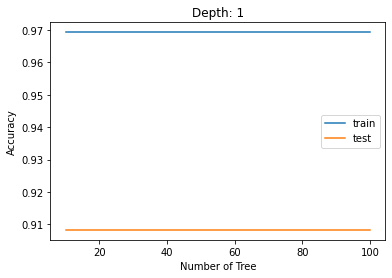

,Depth,Num of Tree,Train,Test
0,1,10,0.969325,0.908257
1,1,20,0.969325,0.908257
2,1,40,0.969325,0.908257
3,1,60,0.969325,0.908257
4,1,80,0.969325,0.908257
5,1,100,0.969325,0.908257


In [25]:
# depth = 1 
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
TestaccuracyIO = []
TrainaccuracyIO = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(xTrain,yTrain.values.ravel())
    Trainacc = clf.score(xTrain, yTrain)
    Testacc = clf.score(xTest, yTest)
    TrainaccuracyIO.append(Trainacc)
    TestaccuracyIO.append(Testacc)
plt.plot(numTree, TrainaccuracyIO)
plt.plot(numTree, TestaccuracyIO)
plt.title("Depth: 1")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree1IO = {'Depth' : 1,
    'Num of Tree' : numTree,
      'Train': TrainaccuracyIO,
     'Test' : TestaccuracyIO}
decTreeTb1IO = pd.DataFrame(decTree1IO)
decTreeTb1IO

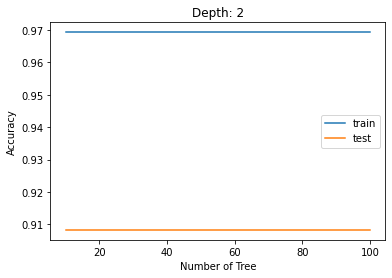

,Depth,Num of Tree,Train,Test
0,2,10,0.969325,0.908257
1,2,20,0.969325,0.908257
2,2,40,0.969325,0.908257
3,2,60,0.969325,0.908257
4,2,80,0.969325,0.908257
5,2,100,0.969325,0.908257


In [26]:
# depth = 2
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
TestaccuracyIO2 = []
TrainaccuracyIO2 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(xTrain,yTrain.values.ravel())
    Trainacc = clf.score(xTrain, yTrain)
    Testacc = clf.score(xTest, yTest)
    TrainaccuracyIO2.append(Trainacc)
    TestaccuracyIO2.append(Testacc)
plt.plot(numTree, TrainaccuracyIO2)
plt.plot(numTree, TestaccuracyIO2)
plt.title("Depth: 2")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree1IO2 = {'Depth' : 2,
    'Num of Tree' : numTree,
      'Train': TrainaccuracyIO2,
     'Test' : TestaccuracyIO2}
decTreeTb1IO2 = pd.DataFrame(decTree1IO2)
decTreeTb1IO2

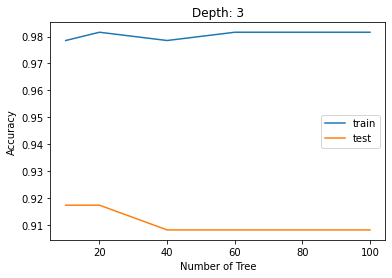

,Depth,Num of Tree,Train,Test
0,3,10,0.978528,0.917431
1,3,20,0.981595,0.917431
2,3,40,0.978528,0.908257
3,3,60,0.981595,0.908257
4,3,80,0.981595,0.908257
5,3,100,0.981595,0.908257


In [27]:
# depth = 3
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
TestaccuracyIO3 = []
TrainaccuracyIO3 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(xTrain,yTrain.values.ravel())
    Trainacc = clf.score(xTrain, yTrain)
    Testacc = clf.score(xTest, yTest)
    TrainaccuracyIO3.append(Trainacc)
    TestaccuracyIO3.append(Testacc)
plt.plot(numTree, TrainaccuracyIO3)
plt.plot(numTree, TestaccuracyIO3)
plt.title("Depth: 3")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree1IO3 = {'Depth' : 3,
    'Num of Tree' : numTree,
      'Train': TrainaccuracyIO3,
     'Test' : TestaccuracyIO3}
decTreeTb1IO3 = pd.DataFrame(decTree1IO3)
decTreeTb1IO3

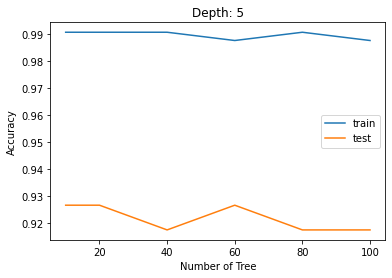

,Depth,Num of Tree,Train,Test
0,5,10,0.990798,0.926606
1,5,20,0.990798,0.926606
2,5,40,0.990798,0.917431
3,5,60,0.987730,0.926606
4,5,80,0.990798,0.917431
5,5,100,0.987730,0.917431


In [28]:
# depth = 5
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
TestaccuracyIO5 = []
TrainaccuracyIO5 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(xTrain,yTrain.values.ravel())
    Trainacc = clf.score(xTrain, yTrain)
    Testacc = clf.score(xTest, yTest)
    TrainaccuracyIO5.append(Trainacc)
    TestaccuracyIO5.append(Testacc)
plt.plot(numTree, TrainaccuracyIO5)
plt.plot(numTree, TestaccuracyIO5)
plt.title("Depth: 5")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree1IO5 = {'Depth' : 5,
    'Num of Tree' : numTree,
      'Train': TrainaccuracyIO5,
     'Test' : TestaccuracyIO5}
decTreeTb1IO5 = pd.DataFrame(decTree1IO5)
decTreeTb1IO5

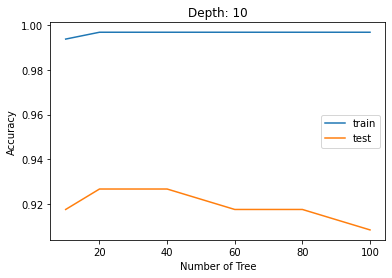

,Depth,Num of Tree,Train,Test
0,10,10,0.993865,0.917431
1,10,20,0.996933,0.926606
2,10,40,0.996933,0.926606
3,10,60,0.996933,0.917431
4,10,80,0.996933,0.917431
5,10,100,0.996933,0.908257


In [29]:
# depth = 10
# number of trees = 10, 20, 40, 60, 80, 100
numTree = [10, 20, 40, 60, 80, 100]
TestaccuracyIO10 = []
TrainaccuracyIO10 = []
for n_estimators in numTree:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=10),
                           n_estimators=n_estimators, random_state=1)
    clf.fit(xTrain,yTrain.values.ravel())
    Trainacc = clf.score(xTrain, yTrain)
    Testacc = clf.score(xTest, yTest)
    TrainaccuracyIO10.append(Trainacc)
    TestaccuracyIO10.append(Testacc)
plt.plot(numTree, TrainaccuracyIO10)
plt.plot(numTree, TestaccuracyIO10)
plt.title("Depth: 10")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
decTree1IO10 = {'Depth' : 10,
    'Num of Tree' : numTree,
      'Train': TrainaccuracyIO10,
     'Test' : TestaccuracyIO10}
decTreeTb1IO10 = pd.DataFrame(decTree1IO10)
decTreeTb1IO10

SVM Classification

(a) Using a linear kernel (-t 0 option), train the SVM on the training data for different values of C parameter(-c option): 10−4, 10−3, 10−2, 10−1, 100, 101, 102, 103, 104. Com- pute the training accuracy, and testing accuracy for the SVM obtained with different values of the C parameter. Plot the training accuracy and testing accuracy as a func- tion of C (C value on x-axis and Accuracy on y-axis) – one curve each for training, validation, and testing data. List your observations.

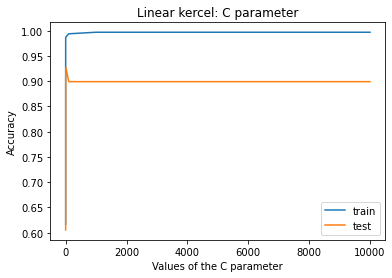

,Kernel,Degree,C Parameter,Train,Test
0,Linear,0,0.0001,0.616564,0.605505
1,Linear,0,0.0010,0.616564,0.605505
2,Linear,0,0.0100,0.941718,0.899083
3,Linear,0,0.1000,0.969325,0.908257
4,Linear,0,1.0000,0.984663,0.908257
5,Linear,0,10.0000,0.987730,0.926606
6,Linear,0,100.0000,0.993865,0.899083
7,Linear,0,1000.0000,0.996933,0.899083
8,Linear,0,10000.0000,0.996933,0.899083


In [30]:
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
TestaccuracyL = []
TrainaccuracyL = []
for n_estimators in cPara:
    svm_md = SVC(kernel='linear', C= n_estimators, random_state=1)
    svm_md.fit(xTrain,yTrain.values.ravel())
    Trainacc = svm_md.score(xTrain, yTrain)
    Testacc = svm_md.score(xTest, yTest)
    TrainaccuracyL.append(Trainacc)
    TestaccuracyL.append(Testacc)
plt.plot(cPara, TrainaccuracyL)
plt.plot(cPara, TestaccuracyL)
plt.title("Linear kercel: C parameter")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdList = {'Kernel' : 'Linear',
             'Degree' : 0,
    'C Parameter' : cPara,
      'Train': TrainaccuracyL,
     'Test' : TestaccuracyL}
svmTb = pd.DataFrame(svmMdList)
svmTb

(b) Repeat the experiment (a) with polynomial kernel (-t 1 -d option) of degree 2, 3, and 4. Compare the training and testing accuracies for different kernels (linear, polynomial kernel of degree 2, polynomial kernel of degree 3, and polynomial kernel of degree 4). List your observations.


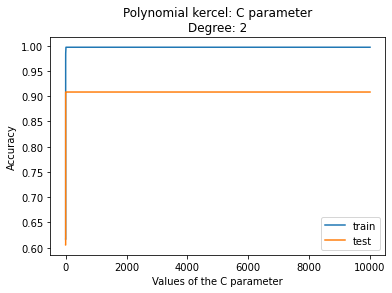

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,2,0.0001,0.616564,0.605505
1,Polynomial,2,0.0010,0.616564,0.605505
2,Polynomial,2,0.0100,0.926380,0.880734
3,Polynomial,2,0.1000,0.969325,0.908257
4,Polynomial,2,1.0000,0.984663,0.908257
5,Polynomial,2,10.0000,0.996933,0.908257
6,Polynomial,2,100.0000,0.996933,0.908257
7,Polynomial,2,1000.0000,0.996933,0.908257
8,Polynomial,2,10000.0000,0.996933,0.908257


In [31]:
# Degree = 2
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Testaccuracy2 = []
Trainaccuracy2 = []
for n_estimators in cPara:
    svm_md = SVC(kernel='poly', degree=2, C= n_estimators, random_state=1)
    svm_md.fit(xTrain,yTrain.values.ravel())
    Trainacc = svm_md.score(xTrain, yTrain)
    Testacc = svm_md.score(xTest, yTest)
    Trainaccuracy2.append(Trainacc)
    Testaccuracy2.append(Testacc)
plt.plot(cPara, Trainaccuracy2)
plt.plot(cPara, Testaccuracy2)
plt.title("Polynomial kercel: C parameter\nDegree: 2")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdListK2 = {'Kernel' : 'Polynomial',
               'Degree' : 2,
    'C Parameter' : cPara,
      'Train': Trainaccuracy2,
     'Test' : Testaccuracy2}
svmTb2 = pd.DataFrame(svmMdListK2)
svmTb2

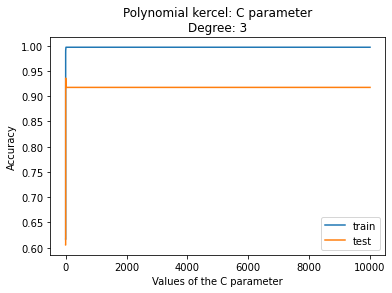

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,3,0.0001,0.616564,0.605505
1,Polynomial,3,0.0010,0.616564,0.605505
2,Polynomial,3,0.0100,0.947853,0.908257
3,Polynomial,3,0.1000,0.984663,0.917431
4,Polynomial,3,1.0000,0.990798,0.935780
5,Polynomial,3,10.0000,0.996933,0.917431
6,Polynomial,3,100.0000,0.996933,0.917431
7,Polynomial,3,1000.0000,0.996933,0.917431
8,Polynomial,3,10000.0000,0.996933,0.917431


In [32]:
# Degree = 3
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Testaccuracy3 = []
Trainaccuracy3 = []
for n_estimators in cPara:
    svm_md = SVC(kernel='poly', degree=3, C= n_estimators, random_state=1)
    svm_md.fit(xTrain,yTrain.values.ravel())
    Trainacc = svm_md.score(xTrain, yTrain)
    Testacc = svm_md.score(xTest, yTest)
    Trainaccuracy3.append(Trainacc)
    Testaccuracy3.append(Testacc)
plt.plot(cPara, Trainaccuracy3)
plt.plot(cPara, Testaccuracy3)
plt.title("Polynomial kercel: C parameter\nDegree: 3")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdListK3 = {'Kernel' : 'Polynomial',
               'Degree' : 3,
    'C Parameter' : cPara,
      'Train': Trainaccuracy3,
     'Test' : Testaccuracy3}
svmTb3 = pd.DataFrame(svmMdListK3)
svmTb3

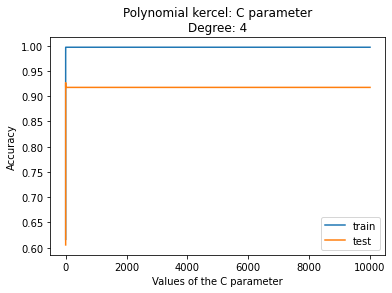

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,4,0.0001,0.616564,0.605505
1,Polynomial,4,0.0010,0.858896,0.862385
2,Polynomial,4,0.0100,0.966258,0.899083
3,Polynomial,4,0.1000,0.984663,0.926606
4,Polynomial,4,1.0000,0.996933,0.917431
5,Polynomial,4,10.0000,0.996933,0.917431
6,Polynomial,4,100.0000,0.996933,0.917431
7,Polynomial,4,1000.0000,0.996933,0.917431
8,Polynomial,4,10000.0000,0.996933,0.917431


In [33]:
# Degree = 4
# C parmaeter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Testaccuracy4 = []
Trainaccuracy4 = []
for n_estimators in cPara:
    svm_md = SVC(kernel='poly', degree=4, C= n_estimators, random_state=1)
    svm_md.fit(xTrain,yTrain.values.ravel())
    Trainacc = svm_md.score(xTrain, yTrain)
    Testacc = svm_md.score(xTest, yTest)
    Trainaccuracy4.append(Trainacc)
    Testaccuracy4.append(Testacc)
plt.plot(cPara, Trainaccuracy4)
plt.plot(cPara, Testaccuracy4)
plt.title("Polynomial kercel: C parameter\nDegree: 4")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
svmMdListK4 = {'Kernel' : 'Polynomial',
               'Degree' : 4,
    'C Parameter' : cPara,
      'Train': Trainaccuracy4,
     'Test' : Testaccuracy4}
svmTb4 = pd.DataFrame(svmMdListK4)
svmTb4

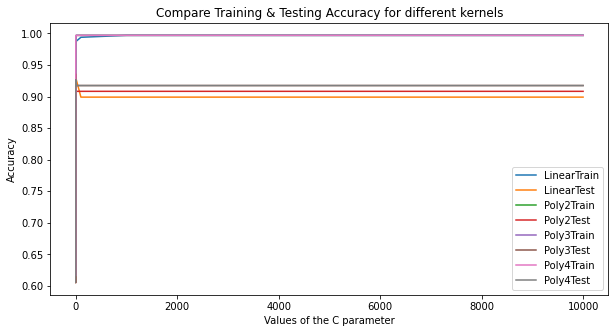

In [34]:
plt.figure(figsize=(10,5))
plt.plot(cPara, TrainaccuracyL)
plt.plot(cPara, TestaccuracyL)
plt.plot(cPara, Trainaccuracy2)
plt.plot(cPara, Testaccuracy2)
plt.plot(cPara, Trainaccuracy3)
plt.plot(cPara, Testaccuracy3)
plt.plot(cPara, Trainaccuracy4)
plt.plot(cPara, Testaccuracy4)
plt.title("Compare Training & Testing Accuracy for different kernels")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['LinearTrain', 'LinearTest',
            'Poly2Train', 'Poly2Test',
           'Poly3Train', 'Poly3Test',
           'Poly4Train', 'Poly4Test'], loc='best')
plt.show()

In [35]:
svmTb

,Kernel,Degree,C Parameter,Train,Test
0,Linear,0,0.0001,0.616564,0.605505
1,Linear,0,0.0010,0.616564,0.605505
2,Linear,0,0.0100,0.941718,0.899083
3,Linear,0,0.1000,0.969325,0.908257
4,Linear,0,1.0000,0.984663,0.908257
5,Linear,0,10.0000,0.987730,0.926606
6,Linear,0,100.0000,0.993865,0.899083
7,Linear,0,1000.0000,0.996933,0.899083
8,Linear,0,10000.0000,0.996933,0.899083


In [36]:
svmTb2

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,2,0.0001,0.616564,0.605505
1,Polynomial,2,0.0010,0.616564,0.605505
2,Polynomial,2,0.0100,0.926380,0.880734
3,Polynomial,2,0.1000,0.969325,0.908257
4,Polynomial,2,1.0000,0.984663,0.908257
5,Polynomial,2,10.0000,0.996933,0.908257
6,Polynomial,2,100.0000,0.996933,0.908257
7,Polynomial,2,1000.0000,0.996933,0.908257
8,Polynomial,2,10000.0000,0.996933,0.908257


In [37]:
svmTb3

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,3,0.0001,0.616564,0.605505
1,Polynomial,3,0.0010,0.616564,0.605505
2,Polynomial,3,0.0100,0.947853,0.908257
3,Polynomial,3,0.1000,0.984663,0.917431
4,Polynomial,3,1.0000,0.990798,0.935780
5,Polynomial,3,10.0000,0.996933,0.917431
6,Polynomial,3,100.0000,0.996933,0.917431
7,Polynomial,3,1000.0000,0.996933,0.917431
8,Polynomial,3,10000.0000,0.996933,0.917431


In [38]:
svmTb4

,Kernel,Degree,C Parameter,Train,Test
0,Polynomial,4,0.0001,0.616564,0.605505
1,Polynomial,4,0.0010,0.858896,0.862385
2,Polynomial,4,0.0100,0.966258,0.899083
3,Polynomial,4,0.1000,0.984663,0.926606
4,Polynomial,4,1.0000,0.996933,0.917431
5,Polynomial,4,10.0000,0.996933,0.917431
6,Polynomial,4,100.0000,0.996933,0.917431
7,Polynomial,4,1000.0000,0.996933,0.917431
8,Polynomial,4,10000.0000,0.996933,0.917431
